In [5]:
!pip install praw
!pip install requests
pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.8 MB/s eta 0:00:00


Collect News Articles

In [3]:
import feedparser
import json

# Function to collect news articles from Google News RSS feeds
def collect_news_data_from_rss(keyword, max_articles=1000):
    articles = []
    rss_url = f'https://news.google.com/rss/search?q={keyword}&hl=en-US&gl=US&ceid=US:en'
    feed = feedparser.parse(rss_url)

    for entry in feed.entries[:max_articles]:
        title = entry.title if 'title' in entry else 'No Title'
        snippet = entry.summary if 'summary' in entry else 'No Snippet'
        articles.append({'title': title, 'snippet': snippet})

    return articles

# Keywords for Solana, Cardano, and Chainlink
keywords = ['Solana', 'Cardano', 'Chainlink']
news_data = {}

# Collect news articles for each keyword
for keyword in keywords:
    print(f'Collecting news articles for {keyword}...')
    news_data[keyword] = collect_news_data_from_rss(keyword)

# Save news data to a JSON file
with open('news_cryptocurrency_data.json', 'w') as file:
    json.dump(news_data, file)

print("News articles collected and saved successfully!")


News articles collected and saved successfully!


Verify Cleaned Data

In [4]:
import json
import re

# Load the news articles data
with open('news_cryptocurrency_data.json', 'r') as file:
    news_data = json.load(file)

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip().lower()

# Clean the articles
for keyword, articles in news_data.items():
    for article in articles:
        article['title'] = clean_text(article['title'])
        article['snippet'] = clean_text(article['snippet'])

# Display a sample of cleaned data for verification
for keyword, articles in news_data.items():
    print(f'\nSample cleaned data for {keyword}:')
    for article in articles[:3]:  # Display first 3 articles for each keyword
        print(f"Title: {article['title']}")
        print(f"Snippet: {article['snippet']}")



Sample cleaned data for Solana:
Title: solana saw nearly half a million tokens launched last month the block
Snippet: a href targetblanksolana saw nearly half a million tokens launched last monthanbspnbspfont colorfffthe blockfont
Title: tokens launched on solana in may report unchained unchained
Snippet: a href targetblank tokens launched on solana in may report unchainedanbspnbspfont colorfffunchainedfont
Title: solana emerges as an institutional favorite following paypal usd launch cointelegraph
Snippet: a href targetblanksolana emerges as an institutional favorite following paypal usd launchanbspnbspfont colorfffcointelegraphfont

Sample cleaned data for Cardano:
Title: cardano price forecast ada trading volume hits m what happens next the crypto basic
Snippet: a href targetblankcardano price forecast ada trading volume hits m what happens nextanbspnbspfont colorfffthe crypto basicfont
Title: cardano tech lead packs the bitcoin chain into one block bitcoinist
Snippet: a href targe

Refined Text Cleaning

In [5]:
import re

# Refine the clean_text function to remove HTML tags and unwanted patterns
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip().lower()

# Clean the articles again
for keyword, articles in news_data.items():
    for article in articles:
        article['title'] = clean_text(article['title'])
        article['snippet'] = clean_text(article['snippet'])

# Display a sample of cleaned data for verification
for keyword, articles in news_data.items():
    print(f'\nSample cleaned data for {keyword}:')
    for article in articles[:3]:  # Display first 3 articles for each keyword
        print(f"Title: {article['title']}")
        print(f"Snippet: {article['snippet']}")



Sample cleaned data for Solana:
Title: solana saw nearly half a million tokens launched last month the block
Snippet: a href targetblanksolana saw nearly half a million tokens launched last monthanbspnbspfont colorfffthe blockfont
Title: tokens launched on solana in may report unchained unchained
Snippet: a href targetblank tokens launched on solana in may report unchainedanbspnbspfont colorfffunchainedfont
Title: solana emerges as an institutional favorite following paypal usd launch cointelegraph
Snippet: a href targetblanksolana emerges as an institutional favorite following paypal usd launchanbspnbspfont colorfffcointelegraphfont

Sample cleaned data for Cardano:
Title: cardano price forecast ada trading volume hits m what happens next the crypto basic
Snippet: a href targetblankcardano price forecast ada trading volume hits m what happens nextanbspnbspfont colorfffthe crypto basicfont
Title: cardano tech lead packs the bitcoin chain into one block bitcoinist
Snippet: a href targe

Tokenization and stop words removal

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (run this once)
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

# Tokenize and remove stop words from the articles
for keyword, articles in news_data.items():
    for article in articles:
        article['title_tokens'] = tokenize_and_remove_stopwords(article['title'])
        article['snippet_tokens'] = tokenize_and_remove_stopwords(article['snippet'])

# Display a sample of tokenized data
for keyword, articles in news_data.items():
    print(f'\nSample tokenized data for {keyword}:')
    for article in articles[:3]:  # Display first 3 articles for each keyword
        print(f"Title Tokens: {article['title_tokens']}")
        print(f"Snippet Tokens: {article['snippet_tokens']}")



Sample tokenized data for Solana:
Title Tokens: ['solana', 'saw', 'nearly', 'half', 'million', 'tokens', 'launched', 'last', 'month', 'block']
Snippet Tokens: ['href', 'targetblanksolana', 'saw', 'nearly', 'half', 'million', 'tokens', 'launched', 'last', 'monthanbspnbspfont', 'colorfffthe', 'blockfont']
Title Tokens: ['tokens', 'launched', 'solana', 'may', 'report', 'unchained', 'unchained']
Snippet Tokens: ['href', 'targetblank', 'tokens', 'launched', 'solana', 'may', 'report', 'unchainedanbspnbspfont', 'colorfffunchainedfont']
Title Tokens: ['solana', 'emerges', 'institutional', 'favorite', 'following', 'paypal', 'usd', 'launch', 'cointelegraph']
Snippet Tokens: ['href', 'targetblanksolana', 'emerges', 'institutional', 'favorite', 'following', 'paypal', 'usd', 'launchanbspnbspfont', 'colorfffcointelegraphfont']

Sample tokenized data for Cardano:
Title Tokens: ['cardano', 'price', 'forecast', 'ada', 'trading', 'volume', 'hits', 'happens', 'next', 'crypto', 'basic']
Snippet Tokens: [

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentiment Analysis

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(tokens):
    text = ' '.join(tokens)
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

# Perform sentiment analysis on the tokenized articles
for keyword, articles in news_data.items():
    for article in articles:
        title_sentiment = analyze_sentiment(article['title_tokens'])
        snippet_sentiment = analyze_sentiment(article['snippet_tokens'])
        article['title_sentiment'] = title_sentiment
        article['snippet_sentiment'] = snippet_sentiment

# Aggregate sentiment scores
import pandas as pd

def aggregate_sentiment(articles):
    title_sentiments = [article['title_sentiment'] for article in articles]
    snippet_sentiments = [article['snippet_sentiment'] for article in articles]

    # Convert to DataFrame
    title_df = pd.DataFrame(title_sentiments)
    snippet_df = pd.DataFrame(snippet_sentiments)

    # Calculate mean sentiment scores
    title_mean_sentiment = title_df.mean().to_dict()
    snippet_mean_sentiment = snippet_df.mean().to_dict()

    return title_mean_sentiment, snippet_mean_sentiment

# Aggregate sentiment scores for each keyword
aggregated_sentiments = {}
for keyword, articles in news_data.items():
    title_mean_sentiment, snippet_mean_sentiment = aggregate_sentiment(articles)
    aggregated_sentiments[keyword] = {
        'title_mean_sentiment': title_mean_sentiment,
        'snippet_mean_sentiment': snippet_mean_sentiment
    }

# Display aggregated sentiment scores
for keyword, sentiment in aggregated_sentiments.items():
    print(f'\nAggregated sentiment for {keyword}:')
    print(f"Title Mean Sentiment: {sentiment['title_mean_sentiment']}")
    print(f"Snippet Mean Sentiment: {sentiment['snippet_mean_sentiment']}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Aggregated sentiment for Solana:
Title Mean Sentiment: {'neg': 0.03626, 'neu': 0.8724999999999998, 'pos': 0.09124, 'compound': 0.085628}
Snippet Mean Sentiment: {'neg': 0.01361, 'neu': 0.9209499999999999, 'pos': 0.06543, 'compound': 0.088635}

Aggregated sentiment for Cardano:
Title Mean Sentiment: {'neg': 0.03343, 'neu': 0.8539200000000001, 'pos': 0.11265, 'compound': 0.133019}
Snippet Mean Sentiment: {'neg': 0.0268, 'neu': 0.8852599999999999, 'pos': 0.08793, 'compound': 0.115563}

Aggregated sentiment for Chainlink:
Title Mean Sentiment: {'neg': 0.017070000000000002, 'neu': 0.8743100000000001, 'pos': 0.10862, 'compound': 0.15164499999999997}
Snippet Mean Sentiment: {'neg': 0.01169, 'neu': 0.90688, 'pos': 0.08144, 'compound': 0.12857599999999997}


Visualize Sentiment Trends

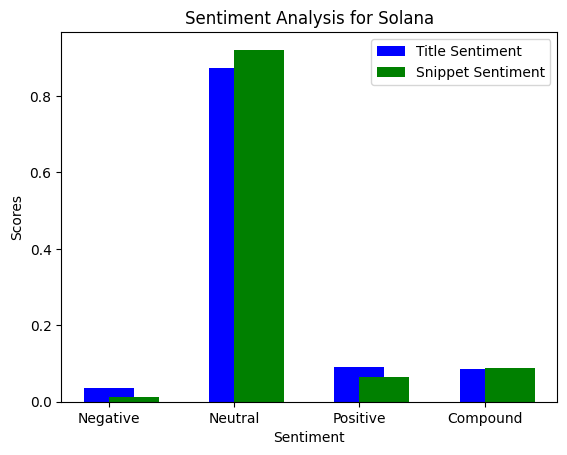

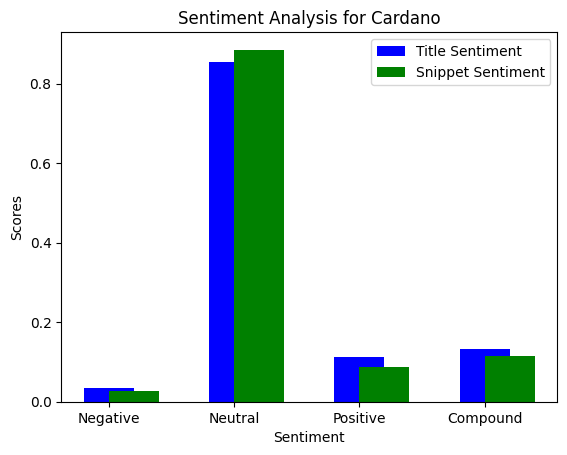

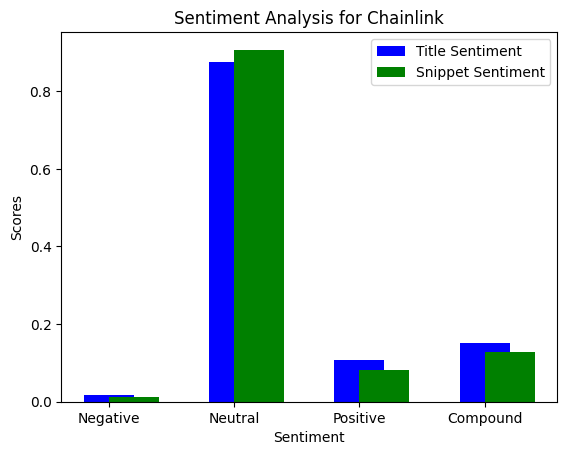

In [8]:
import matplotlib.pyplot as plt

def plot_sentiment(aggregated_sentiments, keyword):
    title_mean_sentiment = aggregated_sentiments[keyword]['title_mean_sentiment']
    snippet_mean_sentiment = aggregated_sentiments[keyword]['snippet_mean_sentiment']

    labels = ['Negative', 'Neutral', 'Positive', 'Compound']
    title_scores = [title_mean_sentiment['neg'], title_mean_sentiment['neu'], title_mean_sentiment['pos'], title_mean_sentiment['compound']]
    snippet_scores = [snippet_mean_sentiment['neg'], snippet_mean_sentiment['neu'], snippet_mean_sentiment['pos'], snippet_mean_sentiment['compound']]

    x = range(len(labels))

    fig, ax = plt.subplots()
    ax.bar(x, title_scores, width=0.4, align='center', label='Title Sentiment', color='blue')
    ax.bar(x, snippet_scores, width=0.4, align='edge', label='Snippet Sentiment', color='green')

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Scores')
    ax.set_title(f'Sentiment Analysis for {keyword}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot sentiment for each keyword
for keyword in keywords:
    plot_sentiment(aggregated_sentiments, keyword)


Correlating Sentiments with Historical Data

In [9]:
pip install pycoingecko


Collect Historical Price Data

In [12]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

# Initialize the CoinGecko API client
cg = CoinGeckoAPI()

# Function to fetch historical price data
def fetch_historical_data(coin_id, days):
    data = cg.get_coin_market_chart_by_id(id=coin_id, vs_currency='usd', days=days)
    prices = data['prices']
    df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
    df = df.groupby('date').mean().reset_index()
    return df[['date', 'price']]

# Fetch historical data for Solana, Cardano, and Chainlink for the last 90 days
solana_prices = fetch_historical_data('solana', 90)
cardano_prices = fetch_historical_data('cardano', 90)
chainlink_prices = fetch_historical_data('chainlink', 90)

# Display the data
print(solana_prices.head())
print(cardano_prices.head())
print(chainlink_prices.head())


         date       price
0  2024-03-07  145.990454
1  2024-03-08  146.531754
2  2024-03-09  146.666241
3  2024-03-10  145.780041
4  2024-03-11  145.542045
         date     price
0  2024-03-07  0.743699
1  2024-03-08  0.733537
2  2024-03-09  0.734988
3  2024-03-10  0.728841
4  2024-03-11  0.738894
         date      price
0  2024-03-07  20.050731
1  2024-03-08  19.928164
2  2024-03-09  20.005129
3  2024-03-10  19.941763
4  2024-03-11  21.343098


Create Sentiment DataFrames

In [13]:
import numpy as np

def create_sentiment_df(aggregated_sentiments, keyword, length):
    sentiment_data = {
        'date': pd.date_range(end=pd.Timestamp.today(), periods=length).date,
        'neg': np.full(length, aggregated_sentiments[keyword]['snippet_mean_sentiment']['neg']),
        'neu': np.full(length, aggregated_sentiments[keyword]['snippet_mean_sentiment']['neu']),
        'pos': np.full(length, aggregated_sentiments[keyword]['snippet_mean_sentiment']['pos']),
        'compound': np.full(length, aggregated_sentiments[keyword]['snippet_mean_sentiment']['compound'])
    }
    return pd.DataFrame(sentiment_data)

# Create sentiment DataFrames
solana_sentiment_df = create_sentiment_df(aggregated_sentiments, 'Solana', len(solana_prices))
cardano_sentiment_df = create_sentiment_df(aggregated_sentiments, 'Cardano', len(cardano_prices))
chainlink_sentiment_df = create_sentiment_df(aggregated_sentiments, 'Chainlink', len(chainlink_prices))

# Display the sentiment data
print(solana_sentiment_df.head())
print(cardano_sentiment_df.head())
print(chainlink_sentiment_df.head())


         date      neg      neu      pos  compound
0  2024-03-07  0.01361  0.92095  0.06543  0.088635
1  2024-03-08  0.01361  0.92095  0.06543  0.088635
2  2024-03-09  0.01361  0.92095  0.06543  0.088635
3  2024-03-10  0.01361  0.92095  0.06543  0.088635
4  2024-03-11  0.01361  0.92095  0.06543  0.088635
         date     neg      neu      pos  compound
0  2024-03-07  0.0268  0.88526  0.08793  0.115563
1  2024-03-08  0.0268  0.88526  0.08793  0.115563
2  2024-03-09  0.0268  0.88526  0.08793  0.115563
3  2024-03-10  0.0268  0.88526  0.08793  0.115563
4  2024-03-11  0.0268  0.88526  0.08793  0.115563
         date      neg      neu      pos  compound
0  2024-03-07  0.01169  0.90688  0.08144  0.128576
1  2024-03-08  0.01169  0.90688  0.08144  0.128576
2  2024-03-09  0.01169  0.90688  0.08144  0.128576
3  2024-03-10  0.01169  0.90688  0.08144  0.128576
4  2024-03-11  0.01169  0.90688  0.08144  0.128576


Merge Sentiment Data with Price Data

In [14]:
# Merge sentiment data with price data
solana_df = pd.merge(solana_sentiment_df, solana_prices, on='date')
cardano_df = pd.merge(cardano_sentiment_df, cardano_prices, on='date')
chainlink_df = pd.merge(chainlink_sentiment_df, chainlink_prices, on='date')

# Display the merged data
print(solana_df.head())
print(cardano_df.head())
print(chainlink_df.head())


         date      neg      neu      pos  compound       price
0  2024-03-07  0.01361  0.92095  0.06543  0.088635  145.990454
1  2024-03-08  0.01361  0.92095  0.06543  0.088635  146.531754
2  2024-03-09  0.01361  0.92095  0.06543  0.088635  146.666241
3  2024-03-10  0.01361  0.92095  0.06543  0.088635  145.780041
4  2024-03-11  0.01361  0.92095  0.06543  0.088635  145.542045
         date     neg      neu      pos  compound     price
0  2024-03-07  0.0268  0.88526  0.08793  0.115563  0.743699
1  2024-03-08  0.0268  0.88526  0.08793  0.115563  0.733537
2  2024-03-09  0.0268  0.88526  0.08793  0.115563  0.734988
3  2024-03-10  0.0268  0.88526  0.08793  0.115563  0.728841
4  2024-03-11  0.0268  0.88526  0.08793  0.115563  0.738894
         date      neg      neu      pos  compound      price
0  2024-03-07  0.01169  0.90688  0.08144  0.128576  20.050731
1  2024-03-08  0.01169  0.90688  0.08144  0.128576  19.928164
2  2024-03-09  0.01169  0.90688  0.08144  0.128576  20.005129
3  2024-03-10 

Line Plot for Sentiment Scores and Price Movements

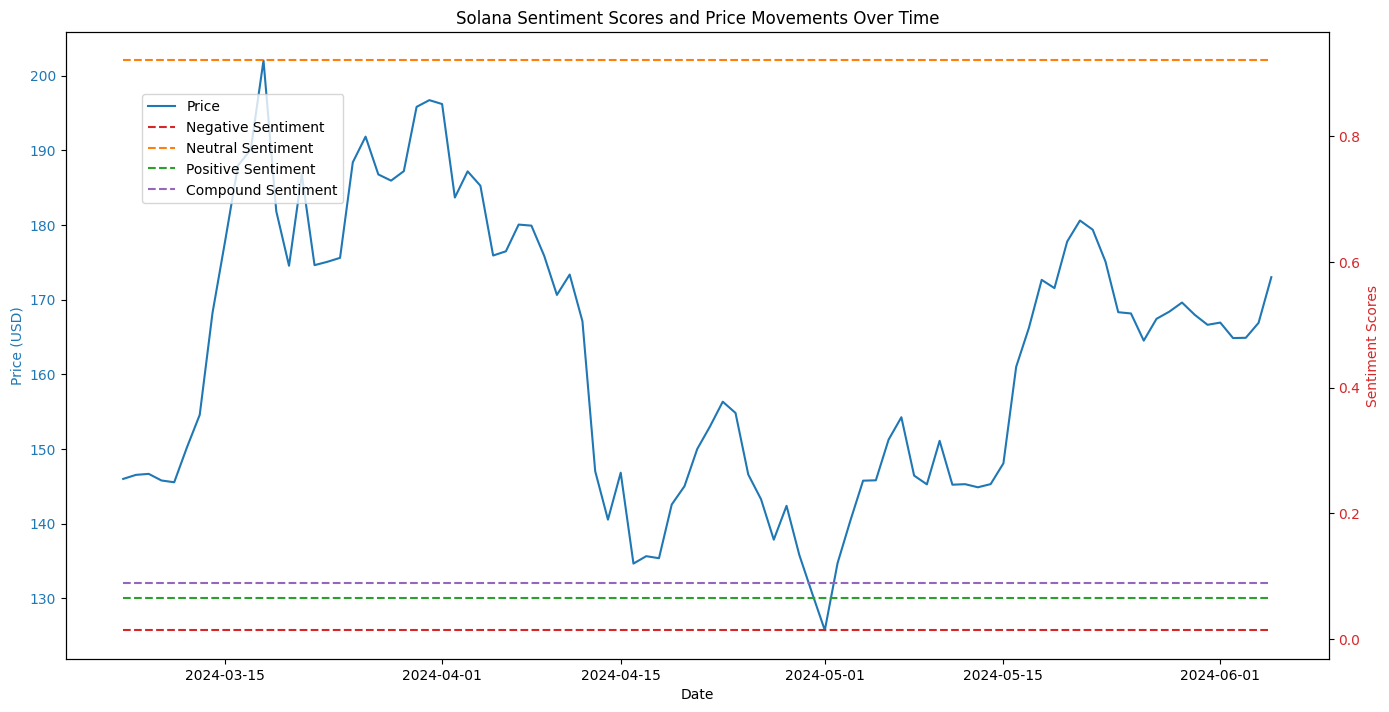

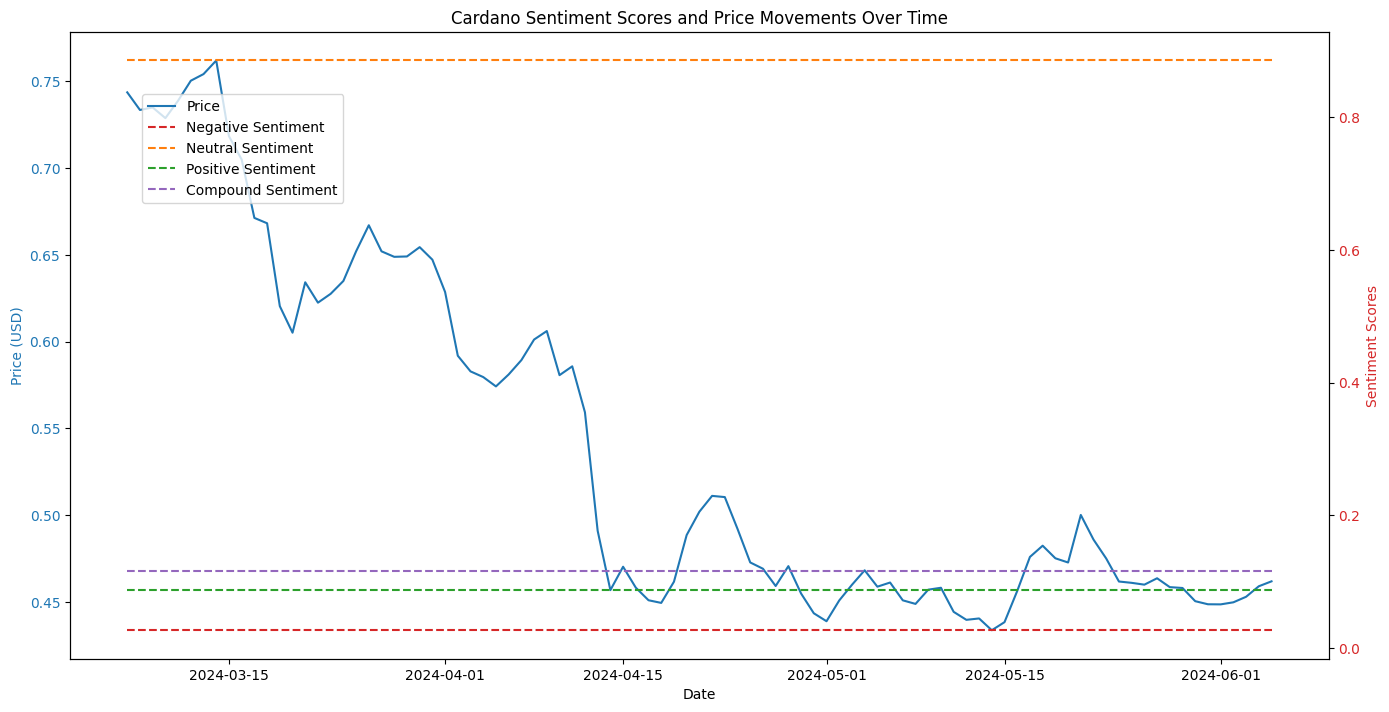

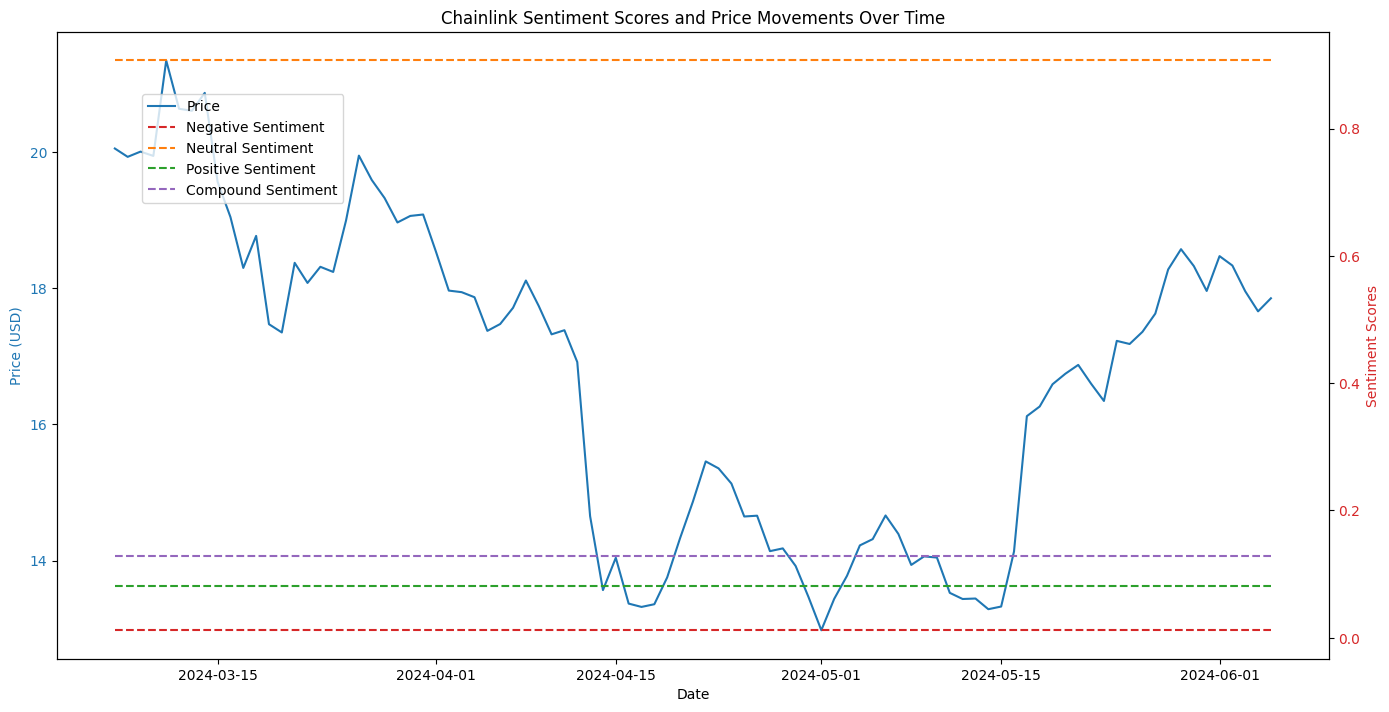

In [16]:
import matplotlib.pyplot as plt

# Function to plot sentiment scores and price movements over time
def plot_sentiment_and_price(df, coin_name):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price (USD)', color='tab:blue')
    ax1.plot(df['date'], df['price'], color='tab:blue', label='Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Sentiment Scores', color='tab:red')
    ax2.plot(df['date'], df['neg'], color='tab:red', linestyle='dashed', label='Negative Sentiment')
    ax2.plot(df['date'], df['neu'], color='tab:orange', linestyle='dashed', label='Neutral Sentiment')
    ax2.plot(df['date'], df['pos'], color='tab:green', linestyle='dashed', label='Positive Sentiment')
    ax2.plot(df['date'], df['compound'], color='tab:purple', linestyle='dashed', label='Compound Sentiment')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.title(f'{coin_name} Sentiment Scores and Price Movements Over Time')
    plt.show()

# Plot sentiment and price for each coin
plot_sentiment_and_price(solana_df, 'Solana')
plot_sentiment_and_price(cardano_df, 'Cardano')
plot_sentiment_and_price(chainlink_df, 'Chainlink')
